# Diffie-Hellman key exchange

The following is a simple implementation of the classic [Diffie-Hellman key exchange](https://en.wikipedia.org/wiki/Diffie%E2%80%93Hellman_key_exchange) cryptographic protocol.

In [1]:
# Public information:
p = Primes()[10^3 + randint(1,10000)] # random prime
g = randint(2, p-1) # random integer

print("Public key: p =", p, "and g =", g, "\n")

a = randint(2, p-1) # Only Alice knows this
b = randint(2, p-1) # Only Bob knows this

print("[[ Alice's secret key: a =", a, "]]")
print("[[ Bob's secret key: b =", b, "]]", "\n")

h1 = (g^a) % p # Alice sends this to Bob
h2 = (g^b) % p # Bob sends this to Alice

print("Alice sends h1 =", h1, "to Bob")
print("Bob sends h2 =", h2, "to Alice", "\n")

secret_a = (h2^a) % p # Alice can compute this because she knows a
secret_b = (h1^b) % p # Bob can compute this because he knows b

print("Alice computed", secret_a, "using h2 and her secret a")
print("Bob computed", secret_b, "using h1 and his secret b")

Public key: p = 97021 and g = 66271 

[[ Alice's secret key: a = 19234 ]]
[[ Bob's secret key: b = 76267 ]] 

Alice sends h1 = 17104 to Bob
Bob sends h2 = 28787 to Alice 

Alice computed 62444 using h2 and her secret a
Bob computed 62444 using h1 and his secret b


## General Diffie-Hellman

The following code is an implementation of a generic Diffie-Hellman key exchange protocol that uses a group $G$ instead of $(\mathbb Z/p \mathbb Z)^\times$.

In [2]:
def genericDH(G):
    if G.cardinality() == 1:
        print("Group is trivial, can't do anything")
        return
    g = G.random_element()
    while g == G.identity(): # Make sure g is not trivial
        g = G.random_element()
        
    print("Public key:\nG =", G, "\ng =", g, "\n")
    
    a = randint(2, G.exponent()-1) # Only Alice knows this
    b = randint(2, G.exponent()-1) # Only Bob knows this

    print("[[ Alice's secret key: a =", a, "]]")
    print("[[ Bob's secret key: b =", b, "]]", "\n")
    
    # "Ternary operator", I did not explain this
    # https://docs.python.org/3/reference/expressions.html#conditional-expressions
    h1 = g^a if G.is_multiplicative() else a*g # Alice sends this to Bob
    h2 = g^b if G.is_multiplicative() else b*g # Bob sends this to Alice

    print("Alice sends h1 =", h1, "to Bob")
    print("Bob sends h2 =", h2, "to Alice", "\n")
    
    secret_a = h2^a if G.is_multiplicative() else a*h2 # Alice can compute this because she knows a
    secret_b = h1^b if G.is_multiplicative() else b*h1 # Bob can compute this because he knows b

    print("Alice computed", secret_a, "using h2 and her secret a")
    print("Bob computed", secret_b, "using h1 and his secret b")
    
E = EllipticCurve(GF(157), [1,-1])
G = E.abelian_group()
genericDH(G)

Public key:
G = Additive abelian group isomorphic to Z/171 embedded in Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x + 156 over Finite Field of size 157 
g = (35 : 131 : 1) 

[[ Alice's secret key: a = 140 ]]
[[ Bob's secret key: b = 73 ]] 

Alice sends h1 = (150 : 80 : 1) to Bob
Bob sends h2 = (18 : 121 : 1) to Alice 

Alice computed (154 : 35 : 1) using h2 and her secret a
Bob computed (154 : 35 : 1) using h1 and his secret b


# Numerical methods for differential equations

## Euler's method (ODE)

In sage you can use [`ode_solver()`](https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/ode.html) to solve any ordinary differential equation by hand, but Euler's method is very simple to implement by hand:

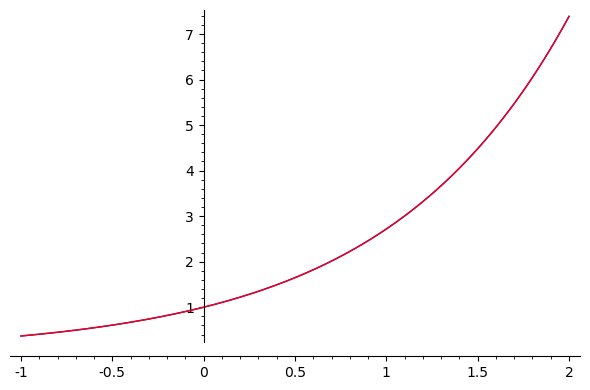

In [8]:
var('y')

def euler_desolve(f, x0, y0, x1):
    n = 10000
    h = (x1-x0)/n
    S = []
    Y = [y0]
    for i in range(n+1):
        S.append(x0 + i*h)
        Y.append(N(  Y[i] + h*f(S[i], Y[i])  ))
    return S, Y

f(x,y) = y
x0 = -1
x1 = 2
y0 = e^(-1)

S, Y = euler_desolve(f, x0, y0, x1)
plot(e^x, -1, 2) + line([(S[i], Y[i]) for i in range(len(S))], color='red', marker='o', markersize=2)

Sage also has an `eulers_method()` function "for pedagogical purposes only":

In [5]:
# Usage: eulers_method(f, x0, y0, h, x1)
eulers_method(f, -1, N(e^(-1)), 0.1, 2)

         x                    y                  h*f(x,y)
        -1    0.367879441171442   0.0367879441171442
-0.900000000000000    0.404667385288587   0.0404667385288587
-0.800000000000000    0.445134123817445   0.0445134123817445
-0.700000000000000    0.489647536199190   0.0489647536199190
-0.600000000000000    0.538612289819109   0.0538612289819109
-0.500000000000000    0.592473518801020   0.0592473518801020
-0.400000000000000    0.651720870681122   0.0651720870681122
-0.300000000000000    0.716892957749234   0.0716892957749234
-0.200000000000000    0.788582253524157   0.0788582253524157
-0.100000000000000    0.867440478876573   0.0867440478876573
-1.38777878078145e-16    0.954184526764230   0.0954184526764230
0.0999999999999999     1.04960297944065    0.104960297944065
0.200000000000000     1.15456327738472    0.115456327738472
0.300000000000000     1.27001960512319    0.127001960512319
0.400000000000000     1.39702156563551    0.139702156563551
0.500000000000000     1.53672372219

## Solving the heat equation with a finite difference method

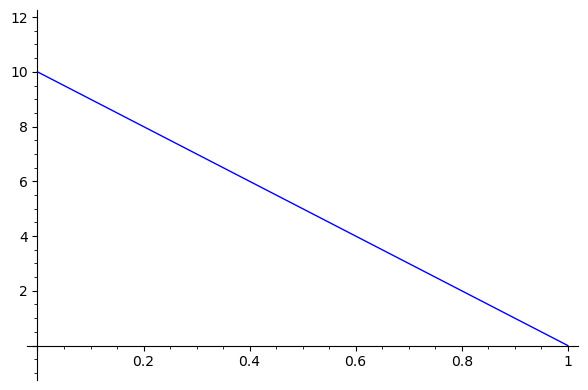

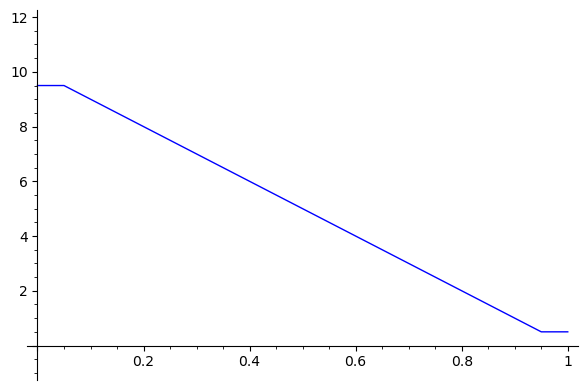

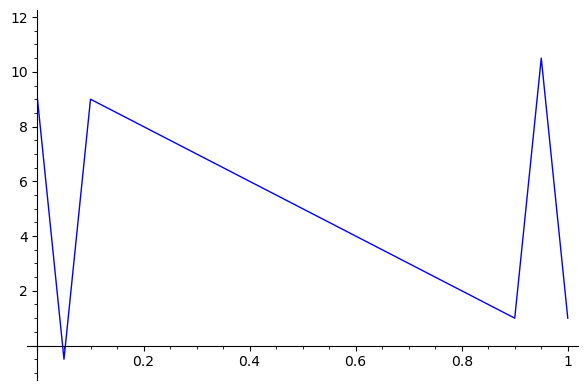

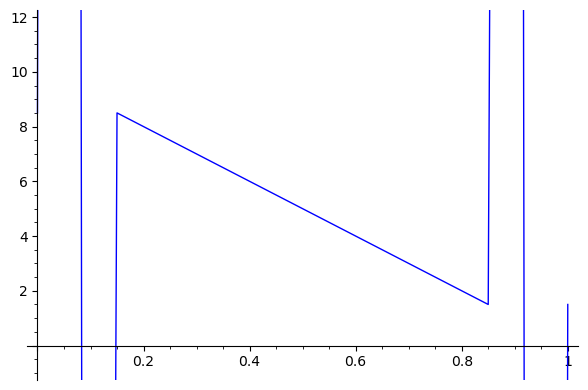

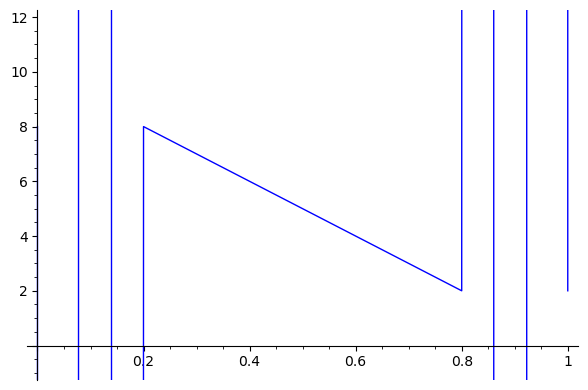

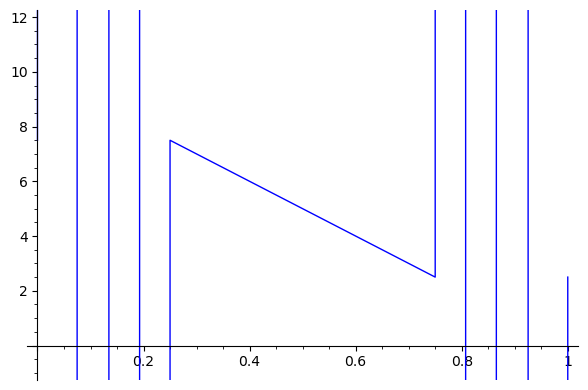

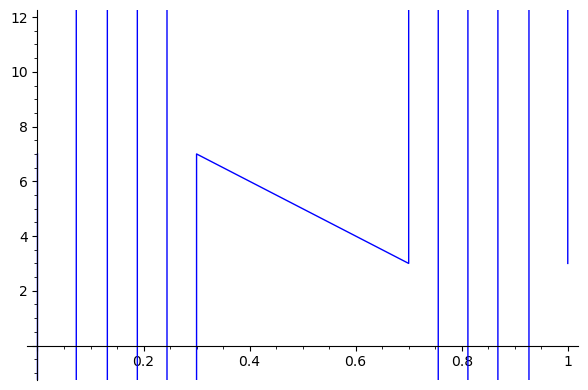

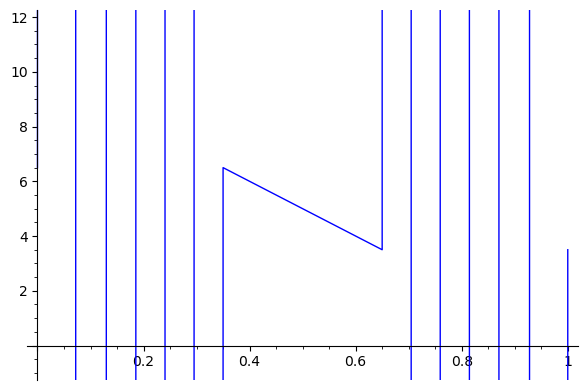

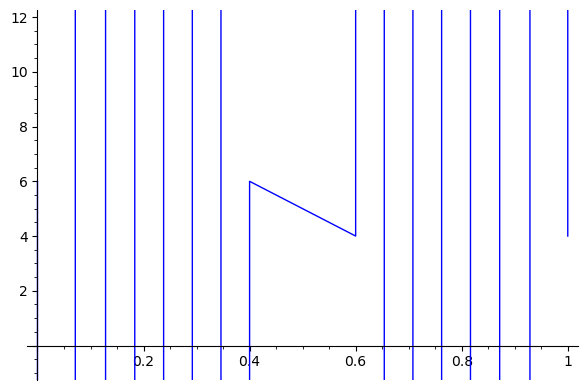

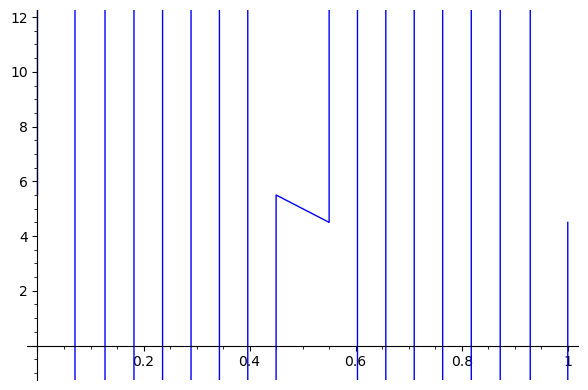

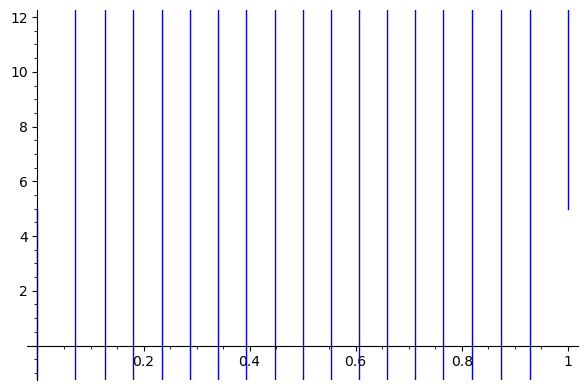

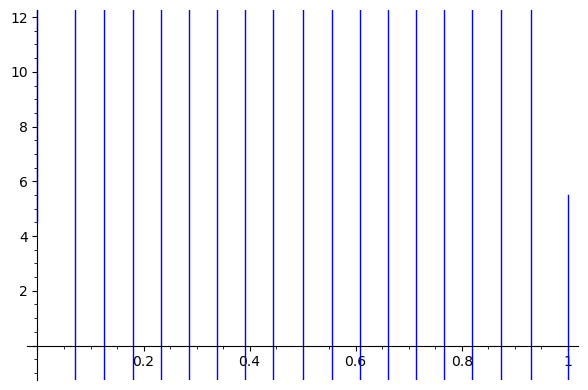

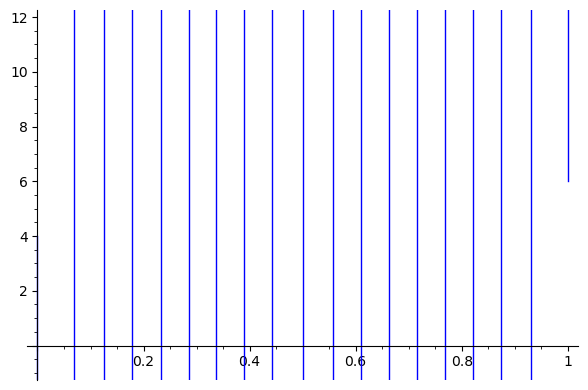

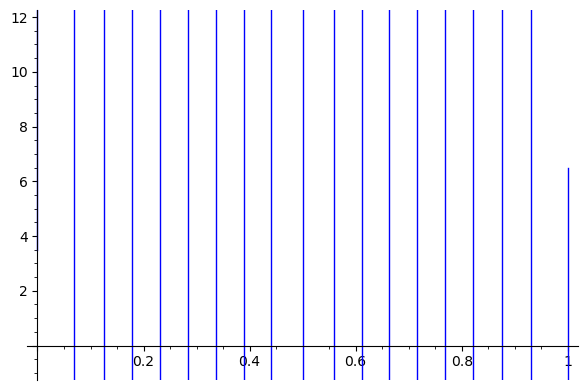

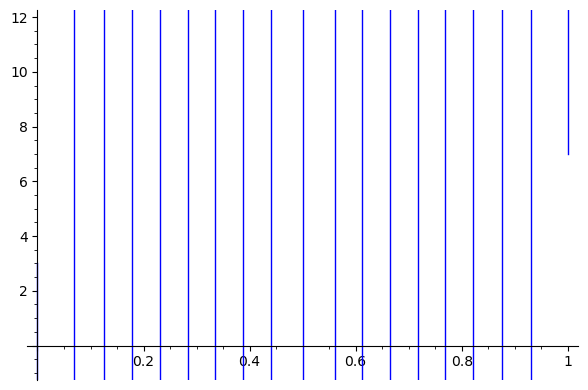

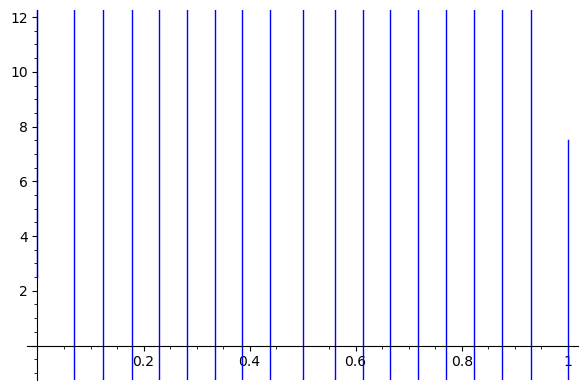

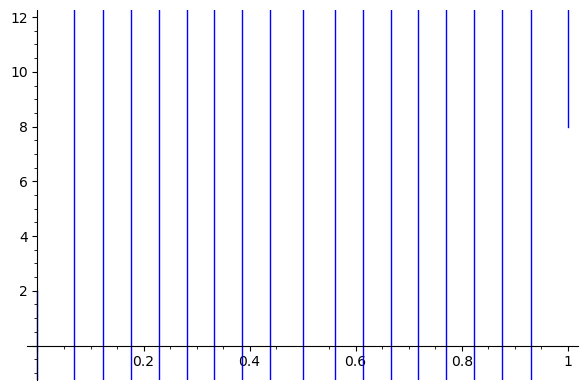

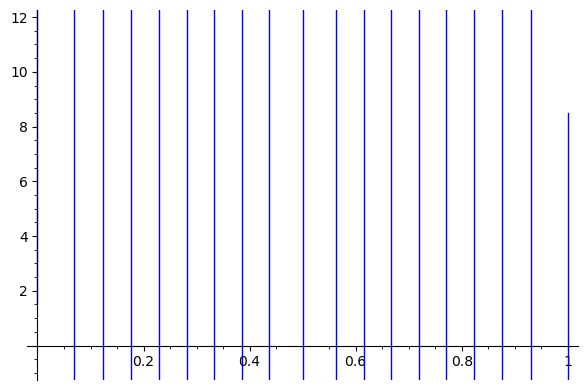

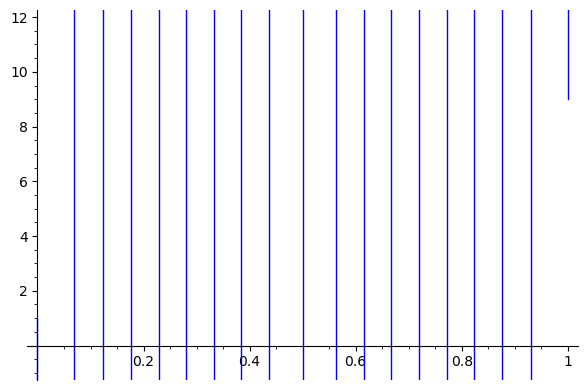

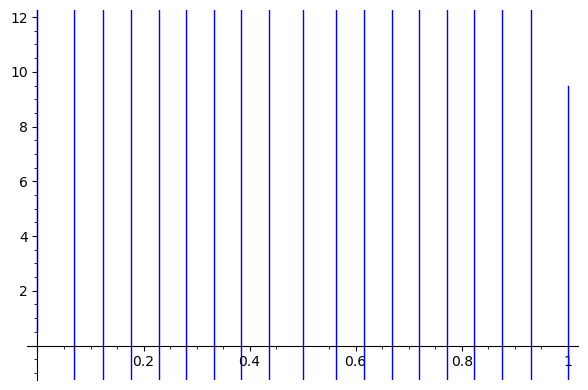

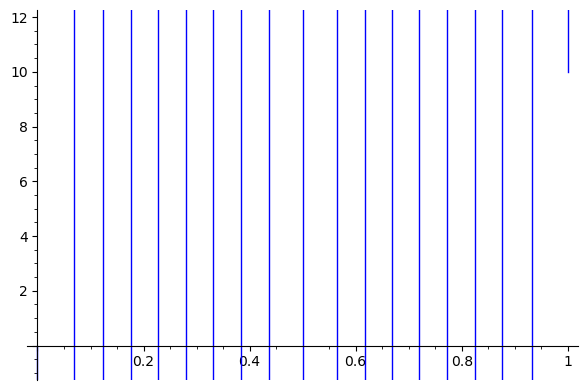

In [9]:
def heat_fdm(u0j, u1j, ui0):
    m, n = len(u0j)-1, len(ui0)-1
    k, h = 1/m, 1/n
    
    u = [[0] * (m+1) for i in range(n+1)]
    for j in range(m+1):
        u[0][j] = u0j[j]
    for j in range(m+1):
        u[n][j] = u1j[j]
    for i in range(n+1):
        u[i][0] = ui0[i]
        
    for j in range(0,m):
        for i in range(1,n):
            u[i][j+1] = (k/(h*h)) * (u[i+1][j] - 2*u[i][j] + u[i-1][j]) + u[i][j]
    
    return u

n, m = 20, 20
u0j = [10 - (j/m)*10 for j in range(m+1)] # One extreme goes from hot to cold
u1j = [(j/m)*10 for j in range(m+1)] # The other does the opposite
ui0 = [10 - (i/m)*10 for i in range(0,n+1)]

u = heat_fdm(u0j, u1j, ui0)
for t in range(m+1):
    show(line([(i/n, u[i][t]) for i in range(n+1)], ymin=-1, ymax =12))